In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
blk = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD/LD_CARMA/count/blksize.txt', sep =' ', names=['chr','size'])
preset_blk = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD/ldblk_hg38.pos', sep = '\t')
preset_blk['blk_size'] = preset_blk.stop-preset_blk.start
preset_blk.chr = preset_blk.chr.str.replace('chr','')

#### check blk size

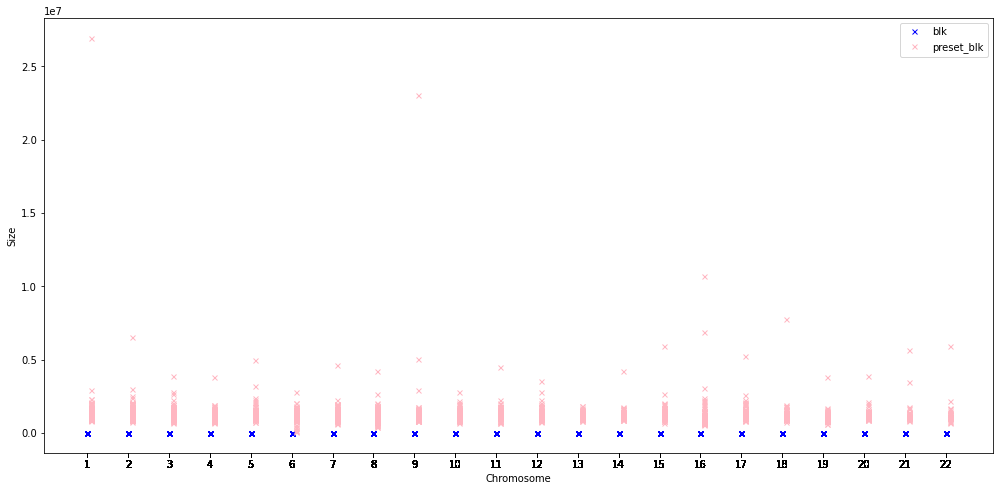

In [25]:
preset_blk['chr_dodged'] = pd.to_numeric(preset_blk['chr']) + 0.1  
fig, ax = plt.subplots(figsize=(17, 8))

blk.plot(x="chr", y="size", linestyle='None', marker='x', markersize=5, color='blue', ax=ax, label='blk')

preset_blk.plot(x="chr_dodged", y="blk_size", linestyle='None', marker='x', markersize=5, color='lightpink', ax=ax, label='preset_blk')

ax.set_xlabel("Chromosome")
ax.set_ylabel("Size")
plt.xticks(blk.chr, fontsize=10)
plt.legend()

# Show the plot
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(17, 8))

blk.plot(x="chr", y="size", linestyle='None', marker='x', markersize=5, color='blue', ax=ax, label='blk')

preset_blk.plot(x="chr_dodged", y="blk_size", linestyle='None', marker='x', markersize=5, color='lightpink', ax=ax, label='preset_blk')

ax.set_xlabel("Chromosome")
ax.set_ylabel("Size")
plt.xticks(blk.chr, fontsize=10)
plt.legend()

# Show the plot
plt.show()


In [3]:
preset_blk.sort_values('blk_size', ascending= False).head(20)

,chr,start,stop,blk_size
84,1,119804513,146766255,26961742
1192,9,41107093,64134903,23027810
1795,16,38277881,48975051,10697170
1903,18,14436989,22204177,7767188
1794,16,31372201,38277473,6905272
233,2,88855466,95373062,6517596
1709,15,17009590,22925075,5915485
2078,22,10516173,16423858,5907685
2049,21,5035658,10716044,5680386
1850,17,22271277,27547976,5276699


In [36]:
preset_blk

,chr,start,stop,blk_size
0,1,10416,2045412,2034996
1,1,2046700,3355997,1309297
2,1,3356191,4320135,963944
3,1,4320284,5251324,931040
4,1,5251916,6197766,945850
...,...,...,...,...
2103,22,46079585,47178586,1099001
2104,22,47179025,48306014,1126989
2105,22,48306044,48985429,679385
2106,22,48991961,49715564,723603


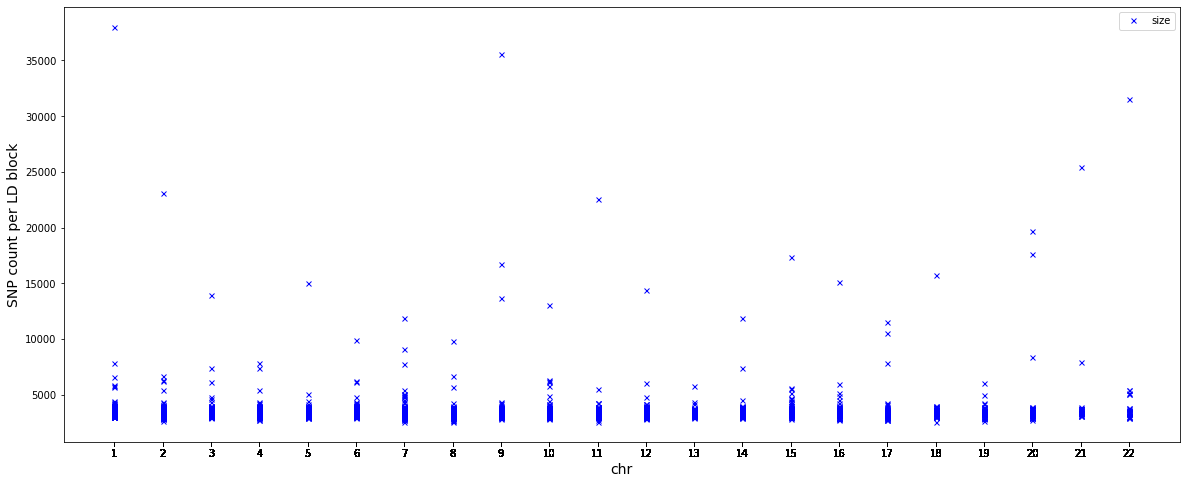

In [10]:
blk.plot("chr", "size", linestyle='None', marker='x', markersize=5, color='blue', figsize=(20,8))
plt.xticks(blk.chr, fontsize=10)
plt.ylabel('SNP count per LD block', fontsize=14)
plt.xlabel('chr', fontsize=14)
plt.show()


### blk size / snp size

In [2]:
snp_blk = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD/LD_CARMA/count/count_snp.txt', sep =' ', names=['chr','blk','snp_in_ld','actual_snp_count'])

In [9]:
snp_blk['label'] = 'chr'+snp_blk['chr'].astype(str) + '_' + snp_blk['blk'].astype(str)


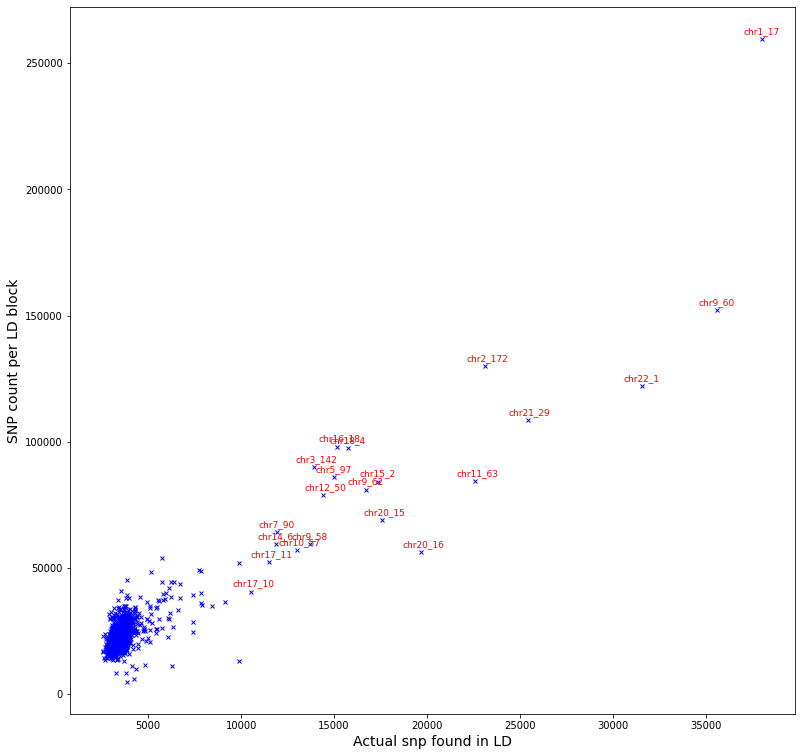

In [20]:
snp_blk.plot("actual_snp_count", "snp_in_ld", linestyle='None', marker='x', markersize=4, color='blue', figsize=(13,13), legend = False)
# plt.xticks(blk.chr, fontsize=10)
for i in range(len(snp_blk)):
    if snp_blk['actual_snp_count'][i] > 10000:
        plt.annotate(snp_blk['label'][i], 
                     (snp_blk['actual_snp_count'][i]-1000, snp_blk['snp_in_ld'][i]+2000), 
                     fontsize=9, color='red')
plt.ylabel('SNP count per LD block', fontsize=14)
plt.xlabel('Actual snp found in LD', fontsize=14)
plt.show()


#### check nan

In [3]:
snp_blk = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD/LD_CARMA/count/count_snp.txt', sep =' ', names=['chr','blk','snp_in_ld','actual_snp_count'])
snp_blk['label'] = 'chr'+snp_blk['chr'].astype(str) + '_' + snp_blk['blk'].astype(str)
nan = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD/LD_CARMA/count/nan_size.txt', sep =' ', names=['chr','blk','nan','result',''])
nan['label'] = 'chr'+nan['chr'].astype(str) + '_' + nan['blk'].astype(str)

In [4]:
check_nan = pd.merge(snp_blk,nan, on = 'label' )
check_nan = check_nan.loc[:,["actual_snp_count","label",'nan','result']]

In [5]:
check_nan['nan%'] = check_nan.nan * 100 / (check_nan.actual_snp_count * check_nan.actual_snp_count)

In [6]:
check_nan.loc[check_nan['result'] == 'Sep', 'result'] = 'success'

In [36]:
check_nan

,actual_snp_count,label,nan,result,nan%
0,31556,chr22_1,30652116,failed,3.078198
1,5442,chr22_2,58579,failed,0.197799
2,5210,chr22_3,183242,failed,0.675071
3,3511,chr22_4,62,success,0.000503
4,5435,chr22_5,168431,failed,0.570194
...,...,...,...,...,...
394,3245,chr15_55,28,success,0.000266
395,3302,chr15_56,8,success,0.000073
396,3669,chr15_57,0,success,0.000000
397,3300,chr15_58,4,failed,0.000037


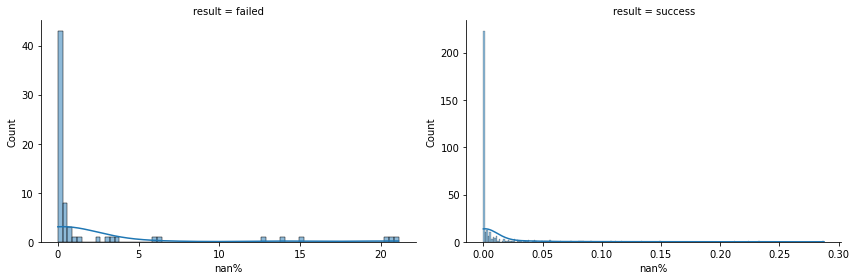

In [24]:
g = sns.FacetGrid(check_nan, col='result', sharex=False, sharey=False, height=4, aspect=1.5)
g.map(sns.histplot, 'nan%', kde=True)  # kde=True to include kernel density estimation

plt.tight_layout()

plt.savefig('/gpfs/commons/home/tlin/pic/ld/distplot.pdf')
plt.show()

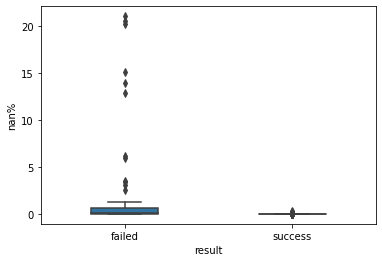

In [25]:
sns.boxplot(data=check_nan, x='result', y='nan%',width=0.4)

plt.savefig('/gpfs/commons/home/tlin/pic/ld/boxplot.pdf')
plt.show()

In [20]:
check_nan.sort_values('nan%', ascending = False).head(30)

,actual_snp_count,label,nan,result,nan%
121,6090,chr19_14,7822941,failed,21.092860
227,10534,chr17_10,22828298,failed,20.572492
161,15769,chr18_4,50353859,failed,20.249973
228,11503,chr17_11,20052754,failed,15.154855
73,17604,chr20_15,43281045,failed,13.966096
75,8446,chr20_17,9189625,failed,12.882366
293,15143,chr16_18,14120410,failed,6.157770
74,19691,chr20_16,22930906,failed,5.914059
341,17379,chr15_2,10658779,failed,3.529051
58,25404,chr21_29,21968844,failed,3.404105
